In [3]:
import pandas as pd

df = pd.read_csv("airline_delays.csv")
df

,Airline,Destination,Status,Count
0,ALASKA,Los Angeles,on_time,497
1,ALASKA,Los Angeles,delayed,62
2,ALASKA,Phoenix,on_time,221
3,ALASKA,Phoenix,delayed,12
4,ALASKA,San Diego,on_time,212
5,ALASKA,San Diego,delayed,20
6,ALASKA,San Francisco,on_time,503
7,ALASKA,San Francisco,delayed,102
8,ALASKA,Seattle,on_time,1841
9,ALASKA,Seattle,delayed,305


In [4]:
wide = df.pivot_table(
    index="Destination",
    columns=["Airline", "Status"],
    values="Count"
)

wide

Airline        ALASKA         AM WEST        
Status        delayed on_time delayed on_time
Destination                                  
Los Angeles      62.0   497.0   117.0   694.0
Phoenix          12.0   221.0   415.0  4840.0
San Diego        20.0   212.0    65.0   383.0
San Francisco   102.0   503.0   129.0   320.0
Seattle         305.0  1841.0    61.0   201.0

In [5]:
# total flights per airline per destination
wide["ALASKA", "total"] = wide["ALASKA", "on_time"] + wide["ALASKA", "delayed"]
wide["AM WEST", "total"] = wide["AM WEST", "on_time"] + wide["AM WEST", "delayed"]

# delay rate (percent)
wide["ALASKA", "delay_rate_%"] = (wide["ALASKA", "delayed"] / wide["ALASKA", "total"]) * 100
wide["AM WEST", "delay_rate_%"] = (wide["AM WEST", "delayed"] / wide["AM WEST", "total"]) * 100

wide

Airline        ALASKA         AM WEST          ALASKA AM WEST       ALASKA  \
Status        delayed on_time delayed on_time   total   total delay_rate_%   
Destination                                                                  
Los Angeles      62.0   497.0   117.0   694.0   559.0   811.0    11.091234   
Phoenix          12.0   221.0   415.0  4840.0   233.0  5255.0     5.150215   
San Diego        20.0   212.0    65.0   383.0   232.0   448.0     8.620690   
San Francisco   102.0   503.0   129.0   320.0   605.0   449.0    16.859504   
Seattle         305.0  1841.0    61.0   201.0  2146.0   262.0    14.212488   

Airline            AM WEST  
Status        delay_rate_%  
Destination                 
Los Angeles      14.426634  
Phoenix           7.897241  
San Diego        14.508929  
San Francisco    28.730512  
Seattle          23.282443

In [6]:
import pandas as pd

# per-destination delay rates
alaska_rate = wide[("ALASKA", "delay_rate_%")]
am_rate     = wide[("AM WEST", "delay_rate_%")]

summary = pd.DataFrame({
    "ALASKA_delay_%": alaska_rate.round(2),
    "AM_WEST_delay_%": am_rate.round(2),
    "Better (lower delay)": (alaska_rate < am_rate).map({True: "ALASKA", False: "AM WEST"}),
    "AM_WEST_minus_ALASKA_%": (am_rate - alaska_rate).round(2)
})

summary

,ALASKA_delay_%,AM_WEST_delay_%,Better (lower delay),AM_WEST_minus_ALASKA_%
Destination,,,,
Los Angeles,11.09,14.43,ALASKA,3.34
Phoenix,5.15,7.90,ALASKA,2.75
San Diego,8.62,14.51,ALASKA,5.89
San Francisco,16.86,28.73,ALASKA,11.87
Seattle,14.21,23.28,ALASKA,9.07


In [7]:
overall = df.groupby(["Airline", "Status"])["Count"].sum().unstack()
overall["total"] = overall["on_time"] + overall["delayed"]
overall["delay_rate_%"] = (overall["delayed"] / overall["total"] * 100).round(2)

overall

Status,delayed,on_time,total,delay_rate_%
Airline,,,,
ALASKA,501,3274,3775,13.27
AM WEST,787,6438,7225,10.89


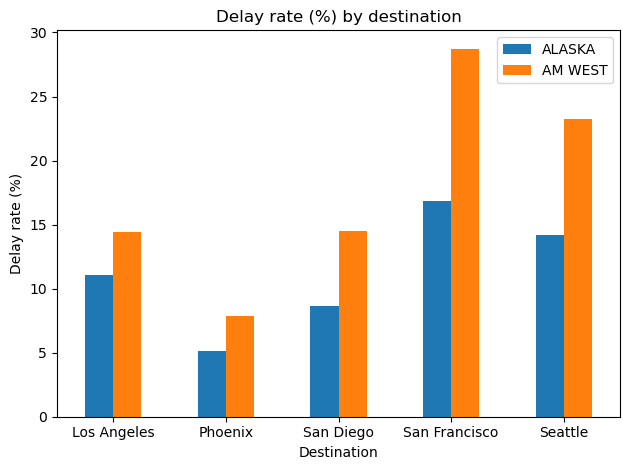

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

plot_df = pd.DataFrame({
    "ALASKA": wide[("ALASKA", "delay_rate_%")],
    "AM WEST": wide[("AM WEST", "delay_rate_%")]
}).round(2)

ax = plot_df.plot(kind="bar")
ax.set_title("Delay rate (%) by destination")
ax.set_ylabel("Delay rate (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Findings / Conclusion

- By destination, ALASKA has lower delay % than AM WEST for all 5 cities (Los Angeles, Phoenix, San Diego, San Francisco, Seattle).
- The biggest difference is San Francisco, where AM WEST delay % is much higher than ALASKA.
- The bar chart makes it easy to see AM WEST has a higher delay % at every destination.

Overall (all flights combined):
- ALASKA delay rate = 13.27%
- AM WEST delay rate = 10.89%

This overall result looks opposite from the destination-by-destination comparison because AM WEST has a very large number of flights to Phoenix, and Phoenix has a relatively low delay % for AM WEST. When totals are combined, Phoenix heavily influences the overall rate, which pulls AM WEST overall delay % down. So ALASKA is better at each destination, but AM WEST looks better overall due to flight volume/weighting.